In [1]:
import sys
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
from IPython.display import display
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Using TensorFlow backend.


In [2]:
from keras.applications import resnet50
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
model=ResNet50()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [47]:
def process_image(path, net, H, W,  preprocess=True):
    """Load and preprocess image."""
    x = image.load_img(path, target_size=(H, W))
    x = image.img_to_array(x)
    x = np.expand_dims(x, axis=0)
    if preprocess:
        x = net.preprocess_input(x)
    return x

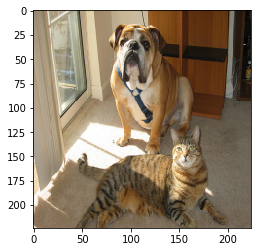

In [46]:
image_path = "./cat_dog.png"
#display(Image(image_path))
not_processed=process_image(image_path, resnet50, H=224, W=224, preprocess=False)
plt.imshow(not_processed[0]/255)


### LIME

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


array([[[[ 6.0609970e+00,  1.9221001e+01,  3.1320000e+01],
         [ 2.0609970e+00,  1.6221001e+01,  2.1320000e+01],
         [ 6.0997009e-02,  1.3221001e+01,  2.1320000e+01],
         ...,
         [-9.8939003e+01, -1.0677900e+02, -1.1468000e+02],
         [-9.2939003e+01, -1.0077900e+02, -1.0568000e+02],
         [-8.9939003e+01, -9.6778999e+01, -9.7680000e+01]],

        [[ 1.3060997e+01,  2.0221001e+01,  3.2320000e+01],
         [ 9.0609970e+00,  1.9221001e+01,  2.6320000e+01],
         [ 2.0609970e+00,  1.4221001e+01,  2.2320000e+01],
         ...,
         [-9.7939003e+01, -1.0577900e+02, -1.1368000e+02],
         [-9.3939003e+01, -1.0177900e+02, -1.0668000e+02],
         [-8.3939003e+01, -9.0778999e+01, -9.1680000e+01]],

        [[ 1.5060997e+01,  2.2221001e+01,  3.3320000e+01],
         [ 1.0060997e+01,  1.9221001e+01,  2.7320000e+01],
         [ 4.0609970e+00,  1.4221001e+01,  2.2320000e+01],
         ...,
         [-9.7939003e+01, -1.0677900e+02, -1.1368000e+02],
         [

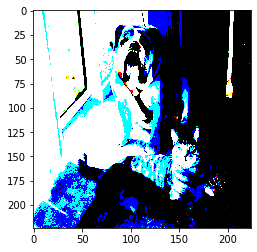

In [45]:
preprocessed_input = (process_image(image_path, resnet50, H=224, W=224))
plt.imshow(preprocessed_input[0])
preprocessed_input

In [10]:
preds = model.predict(preprocessed_input)

In [11]:
print(decode_predictions(preds))

[[('n02108422', 'bull_mastiff', 0.6713731), ('n02108089', 'boxer', 0.17926578), ('n02123159', 'tiger_cat', 0.06445541), ('n02109047', 'Great_Dane', 0.03181279), ('n02123045', 'tabby', 0.007903616)]]


In [12]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

In [13]:
explainer = lime_image.LimeImageExplainer()

In [56]:
def prediction (image):
    final_image=preprocess_input(image*255)
    return(model.predict(final_image))

In [57]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(not_processed[0]/255, prediction, top_labels=5, hide_color=None, num_samples=1000)


Wall time: 4min 26s


In [58]:
from skimage.segmentation import mark_boundaries
#decode_predictions(explanation.top_labels)

In [59]:
labels=np.zeros([1, 1000])
for index, el in enumerate(explanation.top_labels):
    labels[0, el]=1000-index
decode_predictions(labels, top=10)

[[('n02108422', 'bull_mastiff', 1000.0),
  ('n02108089', 'boxer', 999.0),
  ('n02123159', 'tiger_cat', 998.0),
  ('n02109047', 'Great_Dane', 997.0),
  ('n02123045', 'tabby', 996.0),
  ('n02361337', 'marmot', 0.0),
  ('n02326432', 'hare', 0.0),
  ('n02328150', 'Angora', 0.0),
  ('n02342885', 'hamster', 0.0),
  ('n02346627', 'porcupine', 0.0)]]

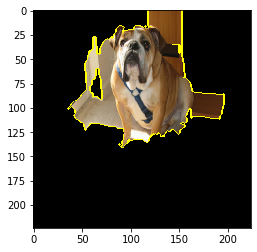

In [69]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=6, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask))

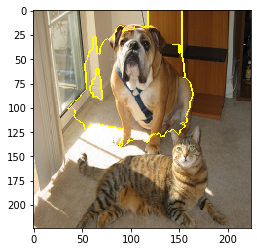

In [62]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

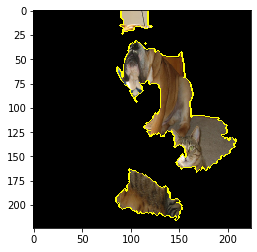

In [64]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask))

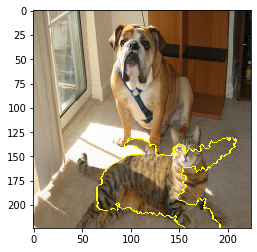

In [63]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[2], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))